Conexión con Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Instalando "Sentence Transformers"

In [4]:
pip install sentence_transformers

     |████████████████████████████████| 79 kB 3.6 MB/s 
     |████████████████████████████████| 3.8 MB 30.8 MB/s 
     |████████████████████████████████| 1.2 MB 5.6 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 895 kB 60.2 MB/s 
     |████████████████████████████████| 596 kB 41.1 MB/s 
     |████████████████████████████████| 6.5 MB 36.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=d08adbe3768c5be90f938c630dd8a4166810f63e99e9dd9f72154628c318fa5f
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Chatbot_SS/archivosAux/preguntas_ss.xlsx')
df.head()

,Pregunta,Categoría
0,¿Cómo lo doy de alta?,tramites de inicio y termino
1,¿Cuál es el proceso para validarlo?,documentos para concluir
2,¿Dónde puedo checar que tenga convenio la inst...,lugar donde realizar el servicio
3,"Si no se registra a tiempo, ¿tengo que repeti...",tiempo para cumplir el servicio
4,¿Cuántas horas son?,tiempo para cumplir el servicio


Clase para obtener palabras más comunes por categioría

In [ ]:
# Necesario para la clase CatWords
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


class CatWords:
  '''
  ( data frame de donde se sacran los datos ,
    categoria de la cual se quieren sacar los datos de frecuencias, 
    stop words que se utilizaran )
  '''
  def __init__(self,df, categoria, stopW = []):
      self.categoria = categoria
      self.stopW = [',','?','¿',':','.','#']
      if len(stopW) != 0:
        self.stopW = stopW

      self.df = df[df.Categoría==self.categoria]
      self.bow = CountVectorizer(stop_words=self.stopW)
      self.caract = self.bow.fit_transform(self.df.Pregunta)      
      self.x = self.caract.toarray()
      self.x = np.array(self.x)
      self.x = self.x.sum(axis=0)
      self.nameTags = self.bow.get_feature_names()
      self.df = pd.DataFrame({
          'Palabra': self.nameTags,
          'Frecuencia': self.x
      })
  def getTable(self, n = 1): 
    '''Regresa una objeto de pandas con fercuencias por palabra con frecuencia mayor a n.'''
    self.n = n
    return(self.df[self.df.Frecuencia > n])

  def getListWords(self, n = 1):
    l = self.getTable(n)
    return list(l.Palabra)

  def plotBar(self):
    '''Grafica de frecuencias de todas las palabras (sin stop words).'''
    fig, ax = plt.subplots()
    y_pos = np.arange(len(self.nameTags))
    ax.barh(y_pos, self.x)
    plt.yticks(y_pos, self.nameTags)
    plt.show()

      

In [ ]:
# Obteniendo categorias unicas
u = df.Categoría.unique()
uniqueCat = []
for i in range(u.shape[0]):
  uniqueCat.append(u[i])

uniqueCat.sort()
print(uniqueCat)

['archivos demasiado grandes', 'cancelacion de servicio', 'conclusion de servicio', 'descarga de solicitud del servicio', 'documentos necesarios', 'documentos para concluir', 'enviar documentos', 'firmas escaneadas en documentos', 'funcionamiento de ventanilla virtual', 'inicio de servicio autorizado', 'liberación de servicio', 'llenado de formato de termino', 'llenado de informe de actividades', 'lugar donde realizar el servicio', 'recepcion de documentos termino', 'requisitos a cumplir', 'sobre tramite de inicio', 'solicitar liberacion de servicio', 'tiempo para cumplir el servicio', 'tiempo sobre tramite', 'tramites de inicio y termino', 'tramites son de termino de servicio social', 'verificacion de registro de servicio social']


Cargando nltk para stop words

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
# Descomentar para ver las stop words que se consideran
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
# Agregando signos de puntuacion a stop words
sw = stopwords.words('spanish')
for a in [',','?','¿',':','.','#']:
  sw.append(a)
#print(sw)

In [ ]:
# Probando con algunas categorías
tiempo = CatWords(df, 'tiempo para cumplir el servicio', stopW=sw)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tiempo.getTable(n = 1)

,Palabra,Frecuencia
2,cuántas,3
3,cuánto,3
6,dura,2
9,horas,3
15,servicio,2
18,social,2
20,tiempo,3


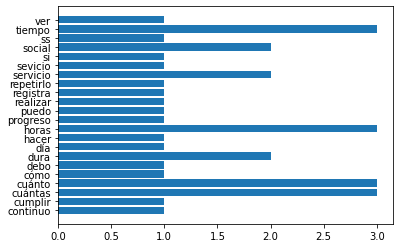

In [ ]:
tiempo.plotBar()

In [ ]:
tiempo.getListWords()

['cuántas', 'cuánto', 'dura', 'horas', 'servicio', 'social', 'tiempo']

In [ ]:
tramite = CatWords(df, 'requisitos a cumplir', sw)
tramite.getTable()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Palabra,Frecuencia
2,créditos,2
4,cuáles,2
11,hacer,2
22,puedo,3
25,registrar,2
26,requisitos,2
27,servicio,5
29,social,2


In [ ]:
# Función para reemplazar letras con tiles
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s


In [ ]:
bod = {}
for i,x in enumerate(uniqueCat,0):
  cat=CatWords(df,x,stopW=sw)
  cat.getListWords()
  print(i,x,cat.getListWords())
  x = normalize(x)
  bod[x] = cat.getListWords()

0 archivos demasiado grandes ['archivos', 'demasiado', 'pasa', 'pesa', 'si']
1 cancelacion de servicio ['cancelar', 'hacer', 'lugar', 'puede', 'puedo', 'servicio']
2 conclusion de servicio ['cómo', 'proceso', 'servicio', 'terminar']
3 descarga de solicitud del servicio ['dónde', 'inicio', 'solicitud']
4 documentos necesarios ['documentos', 'formato', 'iniciar', 'inicio', 'llenar', 'papeles', 'servicio']
5 documentos para concluir []
6 enviar documentos ['cómo', 'documentos', 'dónde', 'enviar', 'facultad', 'ir', 'mandar']
7 firmas escaneadas en documentos []
8 funcionamiento de ventanilla virtual ['cómo', 'ventanilla', 'virtual']
9 inicio de servicio autorizado ['cómo', 'saber', 'servicio', 'si', 'sido', 'sé']
10 liberación de servicio []
11 llenado de formato de termino []
12 llenado de informe de actividades ['actividades', 'cómo', 'informe', 'llenar']
13 lugar donde realizar el servicio ['cuál', 'cómo', 'dónde', 'hacer', 'hacerlo', 'institución', 'pagan', 'puedo', 'saber', 'servicio'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Cargando json con respuestas
import json
import pandas as pd
from pandas import json_normalize
with open('/content/drive/MyDrive/Chatbot_SS/archivosAux/categorias.json') as file:
  data = json.load(file)

df1 = json_normalize(data)
#print(df1)
print(data)



[{'Requisitos a cumplir': 'Tienes que contar con al menos el 70% de créditos totales en DGAE-SIAE, al momento de iniciar el proceso de registro del Servicio Social.\nSólo podrás realizar tu servicio social en alguna institución pública o en organismos no gubernamentales sin fines de lucro, que tengan programas registrados y aprobados para tu licenciatura. '}, {'Tiempo para cumplir el servicio': 'La duración mínima es de 6 meses de trabajo efectivo y máxima de un año calendario, debiendo cubrir un total de 480 horas.'}, {'Lugar donde realizar el servicio': 'Si ya cuentas con el 70% de créditos ingresa al siguiente link https://www.siass.unam.mx/ para ver los programas aprobados para tu licenciatura.\nDebes tener en cuenta lo siguiente:\n-Verifica los lugares disponibles para tu carrera. Si hay lugares disponibles, ponte en contacto con el responsable del programa.\n-Los programas son anuales. Estos se registran en el periodo de noviembre - marzo.\n-Sólo podrás realizar el servicio socia

In [ ]:
# Generando lista de stopwords personalizada
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

all_stopwords = stopwords.words('spanish')
for a in ('servicio','el','y/o','la',',',';','"',':','.','-','<','>', 'social'):
  all_stopwords.append(a)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
diccionario = {}
for x in data:
  x1=x.values()
  cadena=list(x1)
  text=word_tokenize(cadena[0])
  tokens_without_sw = [word for word in text if not word.lower() in all_stopwords]
  x2=list(x.keys())
  #print(x2)
  y = x2[0].lower()
  y = normalize(y)
  if y == 'descarga de solcitud del servicio':
    y = 'descarga de solicitud del servicio'
  diccionario[y]=tokens_without_sw

In [ ]:
print(diccionario)

{'requisitos a cumplir': ['contar', 'menos', '70', '%', 'créditos', 'totales', 'DGAE-SIAE', 'momento', 'iniciar', 'proceso', 'registro', 'Sólo', 'podrás', 'realizar', 'alguna', 'institución', 'pública', 'organismos', 'gubernamentales', 'fines', 'lucro', 'programas', 'registrados', 'aprobados', 'licenciatura'], 'tiempo para cumplir el servicio': ['duración', 'mínima', '6', 'meses', 'trabajo', 'efectivo', 'máxima', 'año', 'calendario', 'debiendo', 'cubrir', 'total', '480', 'horas'], 'lugar donde realizar el servicio': ['Si', 'cuentas', '70', '%', 'créditos', 'ingresa', 'siguiente', 'link', 'https', '//www.siass.unam.mx/', 'ver', 'programas', 'aprobados', 'licenciatura', 'Debes', 'tener', 'cuenta', 'siguiente', '-Verifica', 'lugares', 'disponibles', 'carrera', 'Si', 'lugares', 'disponibles', 'ponte', 'contacto', 'responsable', 'programa', '-Los', 'programas', 'anuales', 'registran', 'periodo', 'noviembre', 'marzo', '-Sólo', 'podrás', 'realizar', 'institución', 'pública', 'organismos', 'gu

In [ ]:
r = list(diccionario.keys())
r.sort()
#r

['archivos demasiado grandes',
 'cancelacion de servicio',
 'conclusion de servicio',
 'constancia de autorizacion de servicio',
 'descarga de solicitud del servicio',
 'documentos necesarios',
 'documentos para concluir',
 'enviar documentos',
 'firmas escaneadas en documentos',
 'funcionamiento de ventanilla virtual',
 'inicio de servicio autorizado',
 'liberacion de servicio',
 'llenado de formato de termino',
 'llenado de informe de actividades',
 'lugar donde realizar el servicio',
 'recepcion de documentos termino',
 'requisitos a cumplir',
 'sobre tramite de inicio',
 'solicitar liberacion de servicio',
 'tiempo para cumplir el servicio',
 'tiempo sobre tramite',
 'tramites de inicio y termino',
 'tramites son de termino de servicio social',
 'verificacion de registro de servicio social']

In [ ]:
rt = list(bod.keys())
rt.sort()
#rt

['archivos demasiado grandes',
 'cancelacion de servicio',
 'conclusion de servicio',
 'descarga de solicitud del servicio',
 'documentos necesarios',
 'documentos para concluir',
 'enviar documentos',
 'firmas escaneadas en documentos',
 'funcionamiento de ventanilla virtual',
 'inicio de servicio autorizado',
 'liberacion de servicio',
 'llenado de formato de termino',
 'llenado de informe de actividades',
 'lugar donde realizar el servicio',
 'recepcion de documentos termino',
 'requisitos a cumplir',
 'sobre tramite de inicio',
 'solicitar liberacion de servicio',
 'tiempo para cumplir el servicio',
 'tiempo sobre tramite',
 'tramites de inicio y termino',
 'tramites son de termino de servicio social',
 'verificacion de registro de servicio social']

In [ ]:
# código para ver si las etiquetas son iguales
from nltk.corpus.reader import rte
import sys
import difflib

def iguales(lista1, lista2):
    r = min(len(lista1), len(lista2))
    for i in range(r):
        if lista1[i]!=lista2[i]:
            print(i, lista1[1], lista2[i])

generador_diferencia1 = difflib.Differ().compare(r, rt)
print(''.join(generador_diferencia1))

  archivos demasiado grandes  cancelacion de servicio  conclusion de servicio- constancia de autorizacion de servicio  descarga de solicitud del servicio  documentos necesarios  documentos para concluir  enviar documentos  firmas escaneadas en documentos  funcionamiento de ventanilla virtual  inicio de servicio autorizado  liberacion de servicio- llenado de formato termino+ llenado de formato de termino?                    +++
  llenado de informe de actividades  lugar donde realizar el servicio- recepcion de documetos termino+ recepcion de documentos termino?                    +
  requisitos a cumplir  sobre tramite de inicio  solicitar liberacion de servicio  tiempo para cumplir el servicio  tiempo sobre tramite  tramites de inicio y termino  tramites son de termino de servicio social  verificacion de registro de servicio social


In [ ]:
d_final = {}
for c in rt:  
  try:
    d_final[c]=bod[c]+diccionario[c]
  except KeyError:
    print(c)


In [ ]:
#Diccionario con palabras más importantes por categoría
print(d_final.keys())

dict_keys(['archivos demasiado grandes', 'cancelacion de servicio', 'conclusion de servicio', 'descarga de solicitud del servicio', 'documentos necesarios', 'documentos para concluir', 'enviar documentos', 'firmas escaneadas en documentos', 'funcionamiento de ventanilla virtual', 'inicio de servicio autorizado', 'liberacion de servicio', 'llenado de formato de termino', 'llenado de informe de actividades', 'lugar donde realizar el servicio', 'recepcion de documentos termino', 'requisitos a cumplir', 'sobre tramite de inicio', 'solicitar liberacion de servicio', 'tiempo para cumplir el servicio', 'tiempo sobre tramite', 'tramites de inicio y termino', 'tramites son de termino de servicio social', 'verificacion de registro de servicio social'])


In [ ]:
sentences = []
for c in rt:
  words = ''
  for w in d_final[c]:
    words = words + ' ' + w
  sentences.append(words)

In [ ]:
sentences

[' archivos demasiado pasa pesa si Puedes buscar navegador alguna aplicación sitio permita reducir tamaño archivos ejemplo palabras reducir tamaño PDF utilizar alguno preferencia posible páginas pidan suscribirte registrarte elección hacerlo',
 " cancelar hacer lugar puede puedo servicio Debes enviar correo electrónico cuenta correo @ ciencias ss-sae+cancelacion @ ciencias.unam.mx cuyo asunto `` Solicitud cancelación SS [ primer apellido segundo apellido nombre ( s ) ] '' ejemplo `` Solicitud cancelación SS Moshinsky Borodiansky Marcos '' cuerpo mensaje deberás indicar siguiente información -Número cuenta -Carrera anexar siguientes documentos formato PDF -Credencial UNAM INE ambos lados -Copia registro aprobado inicio -Una carta motivos formato libre fechada firmada visto bueno asesor Si puedes obtener Vo Bo asesor carta deberás indicar motivos obtuviste",
 ' cómo proceso servicio terminar proceso liberación siguiente -Solicitud Liberación -Documentos -Formato Término -Informe final ac

In [ ]:
# Cargando modelo 
model = SentenceTransformer('hiiamsid/sentence_similarity_spanish_es')
#embeddings = model.encode(sentences)
# Vectorizando las oraciones
#np.save('/content/drive/MyDrive/Chatbot_SS/archivosAux/zero_sentence.npy', embeddings)
#print(embeddings.shape)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/701 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/123 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/439M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/556 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/770 [00:00<?, ?B/s]

In [ ]:
# Cargar arreglo
a = np.load('/content/drive/MyDrive/Chatbot_SS/archivosAux/zero_sentence.npy')

In [ ]:
def cosine_similarity(x, y):
    return np.matmul(x, y) / (np.linalg.norm(x, axis=1) * np.linalg.norm(y))

In [ ]:
for i,n in enumerate(rt):
  print(i, n)

0 archivos demasiado grandes
1 cancelacion de servicio
2 conclusion de servicio
3 descarga de solicitud del servicio
4 documentos necesarios
5 documentos para concluir
6 enviar documentos
7 firmas escaneadas en documentos
8 funcionamiento de ventanilla virtual
9 inicio de servicio autorizado
10 liberacion de servicio
11 llenado de formato de termino
12 llenado de informe de actividades
13 lugar donde realizar el servicio
14 recepcion de documentos termino
15 requisitos a cumplir
16 sobre tramite de inicio
17 solicitar liberacion de servicio
18 tiempo para cumplir el servicio
19 tiempo sobre tramite
20 tramites de inicio y termino
21 tramites son de termino de servicio social
22 verificacion de registro de servicio social


In [ ]:
# modelo zero shot sin roberta 
q = ['¿Cómo puedo dar de alta mi servicio social?']
query = model.encode(q)
c = cosine_similarity(query, np.matrix.transpose(a))[0]
index_max = np.argmax(c)
#print(c)
print(index_max, rt[index_max])

22 verificacion de registro de servicio social


In [ ]:
respuestas = {}
for x in data:
  x1 = x.values()
  x1 = list(x1)
  x2 = list(x.keys())
  y = x2[0].lower()
  y = normalize(y)
  respuestas[y] = x1[0]

In [ ]:
respuestas

{'archivos demasiado grandes': 'Puedes buscar en tu navegador alguna aplicación o sitio que te permita reducir el tamaño de tus archivos, por ejemplo con las palabras reducir tamaño PDF  y utilizar alguno que sea de tu preferencia. Es posible que algunas páginas te pidan suscribirte o registrarte; será elección tuya hacerlo o no.',
 'cancelacion de servicio': 'Debes enviar un correo electrónico desde tu cuenta de correo @ciencias a ss-sae+cancelacion@ciencias.unam.mx cuyo asunto sea "Solicitud de cancelación de SS - [primer apellido segundo apellido nombre(s)]".\nPor ejemplo: "Solicitud de cancelación de SS - Moshinsky Borodiansky Marcos". En el cuerpo del mensaje deberás indicar la siguiente información:\n\t-Número de cuenta\n\t-Carrera\ny anexar los siguientes documentos en formato PDF:\n\t-Credencial de la UNAM o INE, por ambos lados\n\t-Copia de tu registro aprobado de inicio de Servicio Social\n\t-Una carta de motivos en formato libre, fechada, firmada por ti y con el visto bueno 

In [ ]:
# Modelo de Roberta
from transformers import pipeline
qa_pipe = pipeline("question-answering", model='PlanTL-GOB-ES/roberta-base-bne-sqac')

Downloading:   0%|          | 0.00/663 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/473M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/831k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/497k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [ ]:
# modelo zero shot con roberta 
q = ['¿Cuántas horas tengo que cumplir de servcio social?']
query = model.encode(q)
c = cosine_similarity(query, np.matrix.transpose(a))[0]
index_max = np.argmax(c)
context = respuestas[rt[index_max]]
print(index_max, rt[index_max])
print(context)
print(qa_pipe({'context':context, 'question': q[0]}))

18 tiempo para cumplir el servicio
La duración mínima es de 6 meses de trabajo efectivo y máxima de un año calendario, debiendo cubrir un total de 480 horas.
{'score': 0.9184380173683167, 'start': 112, 'end': 115, 'answer': '480'}
